# Mouvement brownien

Premièrement théorisé par Einstein en 1905, le mouvement brownien est le mouvement aléatoire de particules microscopiques en suspension dans un fluide (liquide ou gaz). Causé par les collisions incessantes entre les particules en suspension et les molécules du fluide environnant, ce phénomène a été pour la première fois décrit mathématique par Langevin en 1908. On se propose ici, à travers diverses simulations numériques, d'illustrer ce phénomène physique fondamental.

## Equation de Langevin
L'équation de Langevin décrit le mouvement d'une particule soumise à des forces aléatoires. Elle s'écrit sous la forme suivante :
$$m \frac{d^2 x(t)}{dt^2} = -\gamma \frac{dx(t)}{dt} + f(x) + \eta(t)$$
où :
- $m$ est la masse de la particule _(en kg)_
- $\gamma$ est le coefficient de friction _(en kg/s)_
- $f(x)$ est une force externe appliquée à la particule (et ne dépendant pas du temps) _(en N)_
- $\eta(t)$ est une force aléatoire représentant les collisions entre particules, dont l'intensité dependant essentiellement de la température. _(en N)_

## Cas de sur-amortissement

Prenons premièrement le cas de sur-amortissement, où l'on peut négliger le terme d'inertie. L'équation de Langevin se simplifie alors en :
$$\gamma \frac{dx(t)}{dt} = f(x) + \eta(t)$$

On peut également la réécrire sous la forme d'une équation différentielle stochastique (EDS) :
$$dx(t) = \frac{f(x)}{\gamma} dt + \sqrt{2Ddt} R(t)$$
avec $D$ le coefficient de diffusion _en m²/s_, et $R(t)$ un bruit blanc gaussien de moyenne nulle et de variance unitaire.



### Cas sans force extérieure
Commençons par simuler le cas où il n'y a pas de force extérieure, c'est à dire $f(x) = 0$. Prenons comme premier exemple le cas où $D=1$ et $\gamma=1$. Nous allons simuler la trajectoire d'une particule soumise à ce mouvement brownien sur une durée de 1000 secondes, avec un pas de temps de 0.1 seconde.

In [159]:
import numpy as np
import matplotlib.pyplot as plt
from free_particle import euler_maruyama

# Paramètres de la simulation
step = 10000 # Nombre de pas de temps
dt = 0.01 # Pas de temps
gamma = 1.0 # Coefficient de friction
D = 1.0 # Coefficient de diffusion
x0 = 0.0 # Position initiale

# Simulation du mouvement brownien
T = step*dt # Temps total de simulation
x = euler_maruyama(D, gamma, T, dt)
t = np.arange(0, T, dt)

# Simulation de plusieurs random-walk pour faire la moyenne sur plein
n_walks = 1_000
x_0 = np.zeros((n_walks,))
x_walks = euler_maruyama(D, gamma, T, dt, x0=x_0)
x_mean = np.mean(x_walks, axis=0)
x_var = np.var(x_walks, axis=0)

In [160]:
nb = 5000
print(f"Moyenne sur {n_walks} random-walks : {x_walks[nb].mean()}")
print(f"Variance sur {n_walks} random-walks : {x_walks[nb].var()}")

Moyenne sur 1000 random-walks : 0.22393264710465485
Variance sur 1000 random-walks : 104.12746952548174


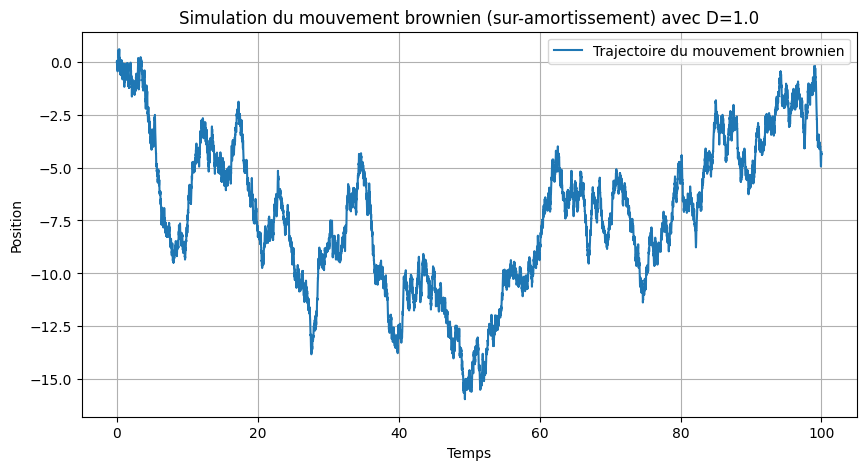

In [161]:
# Tracé de la trajectoire
plt.figure(figsize=(10, 5))
plt.plot(t, x, label='Trajectoire du mouvement brownien')
plt.xlabel('Temps')
plt.ylabel('Position')
plt.title('Simulation du mouvement brownien (sur-amortissement) avec D={}'.format(D))
plt.legend()
plt.grid()
plt.show()

In [162]:
import ipywidgets as widgets

def show_stats(nb):
    plt.figure(figsize=(8, 4))
    plt.hist(x_walks[nb], bins=80, density=True)
    plt.xlabel("Position")
    plt.ylabel("Densite de probabilite")
    plt.title("Distribution des positions sur {} random-walks".format(n_walks))
    plt.show()

nb_slider = widgets.IntSlider(
    value=5000,
    min=0,
    max=x_walks.shape[0] - 1,
    step=1,
    description="nb",
)

widgets.interact(show_stats, nb=nb_slider)

<function __main__.show_stats(nb)>

### Influence du coefficient D

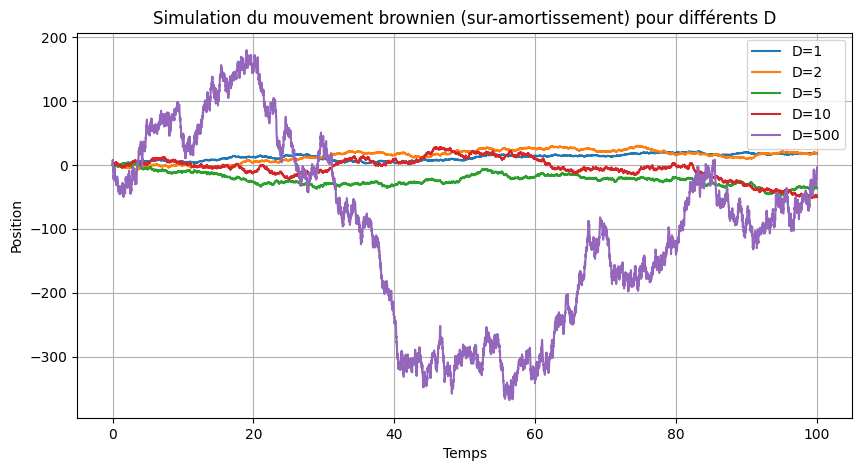

In [163]:
# Avec différents D

D = [1,2,5,10,500]
x = np.zeros((len(D), step))
for i, d in enumerate(D):
    x[i] = euler_maruyama(d, gamma, T, dt)[:, 0]

# Tracé de la trajectoire
plt.figure(figsize=(10, 5))
for i, d in enumerate(D):
    plt.plot(t, x[i], label='D={}'.format(d))
plt.xlabel('Temps')
plt.ylabel('Position')
plt.title('Simulation du mouvement brownien (sur-amortissement) pour différents D')
plt.legend()
plt.grid()
plt.show()

On constate que l'augmentation de D rend la trajectoire beaucoup plus étendue confirmant notre intuition que D est un coefficient de diffusion. En effet, plus D est grand, plus la particule subit des forces aléatoires importantes, ce qui se traduit par une trajectoire plus erratique et "de grande variance".

### Ajout d'une force extérieure
#### Potentiel harmonique

Ajoutons maintenant une force extérieure dérivant d'un potentiel qu'on choisira comme harmonique. Le potentiel harmonique est défini par :
$$V(x) = \frac{1}{2} k x^2$$
où $k$ est la constante de raideur du potentiel. La force correspondante est donnée par :
$$f(x) = -\frac{dV}{dx} = -kx$$



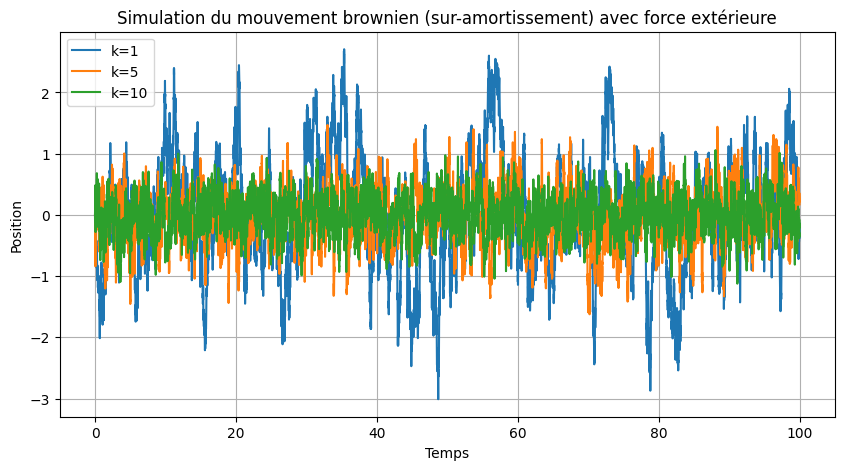

In [164]:
## Paramètres changés pour cette résolution
n_walks = 1000
k_liste = [1, 5, 10]
D = 1.0 # Coefficient de diffusion
y = np.zeros((len(k_liste), step, n_walks,))
x_0 = np.zeros((n_walks,))

# Simulation du mouvement brownien avec force extérieure
for i, k in enumerate(k_liste):
    y[i] = euler_maruyama(D, gamma, T, dt, f=lambda x: -k*x, x0=x_0)


walk_nb = 500
# Tracé de la trajectoire
plt.figure(figsize=(10, 5))
for i, k in enumerate(k_liste):
    plt.plot(t, y[i, :, walk_nb], label='k={}'.format(k))

plt.xlabel('Temps')
plt.ylabel('Position')
plt.title('Simulation du mouvement brownien (sur-amortissement) avec force extérieure')
plt.legend()
plt.grid()
plt.show()


#### Potentiel de double puits
Prenons maintenant un potentiel de double puits, défini par :
$$V(x) = ax^4 - bx^2$$
où $a$ et $b$ sont des constantes positives. La force correspondante est donnée par :
$$f(x) = -\frac{dV}{dx} = -4ax^3 + 2bx$$

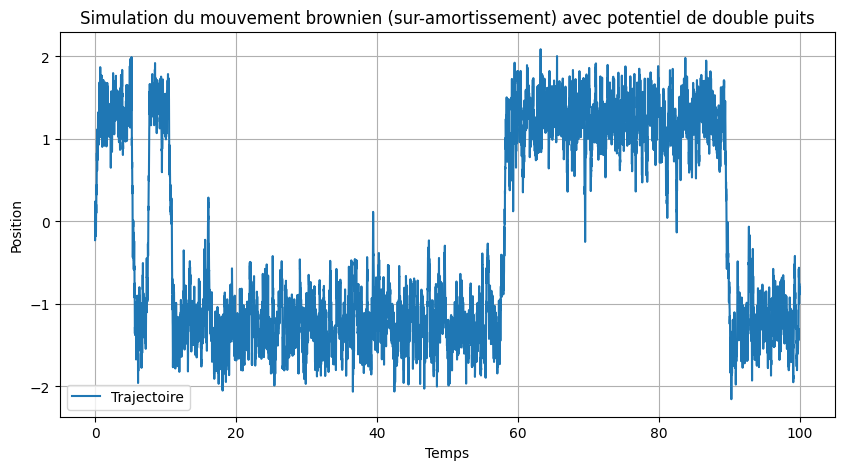

In [165]:
### Paramètres changés pour cette résolution
n_walks = 10000
a = 1.0
b = 3.5
D = 1.0 # Coefficient de diffusion
y = np.zeros((step, n_walks,))
x_0 = np.zeros((n_walks,))

# Simulation du mouvement brownien avec force extérieure
y = euler_maruyama(D, gamma, T, dt, f=lambda x: -4*a*x**3 + 2*b*x, x0=x_0)

# Tracé de la trajectoire
plt.figure(figsize=(10, 5))
plt.plot(t, y[:, 0], label='Trajectoire')
plt.xlabel('Temps')
plt.ylabel('Position')
plt.title('Simulation du mouvement brownien (sur-amortissement) avec potentiel de double puits')
plt.legend()
plt.grid()
plt.show()


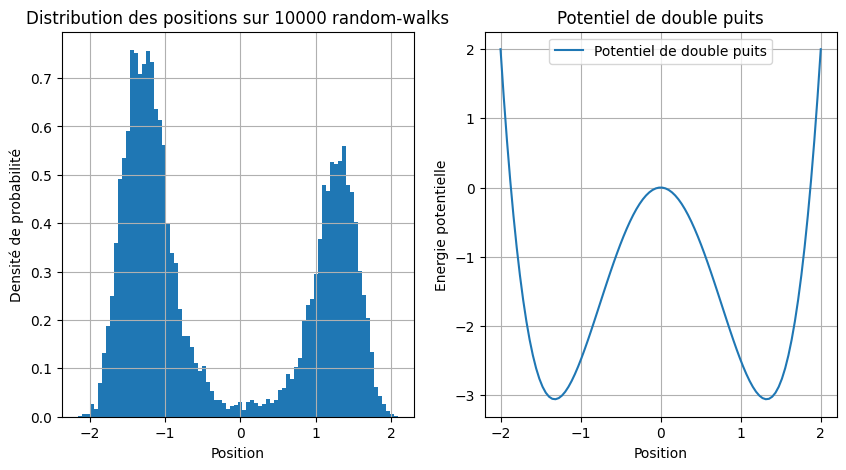

In [166]:
# Bin des positions (ordonnée gauche) en même temps que le potentiel (ordonnée droite)

x = np.linspace(-2, 2, 100)
V = a*x**4 - b*x**2
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(y[:, 0], bins=80, density=True)
plt.xlabel("Position")
plt.ylabel("Densité de probabilité")
plt.title("Distribution des positions sur {} random-walks".format(n_walks))
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(x, V, label='Potentiel de double puits')

plt.xlabel('Position')
plt.ylabel('Energie potentielle')
plt.title('Potentiel de double puits')
plt.legend()
plt.grid()
plt.show()

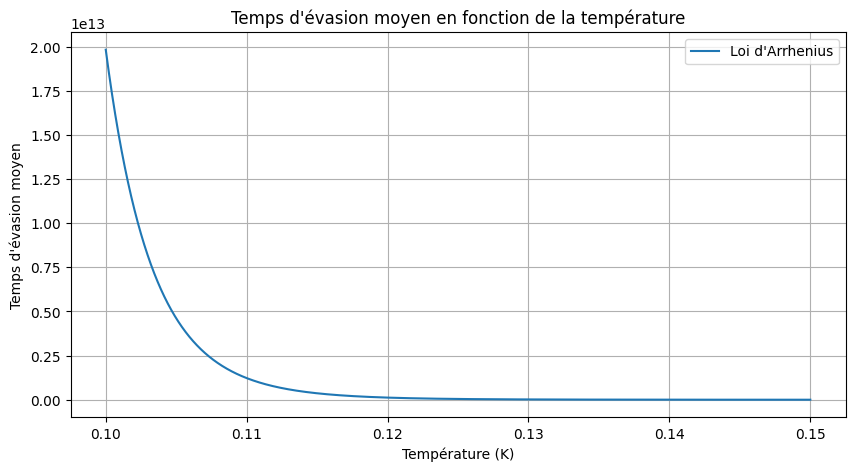

In [185]:
# Temps moyen pour s'échapper du puits avec la loi d'Arrhenius
k_B = 1 # Constante de Boltzmann
T_value = 1 # Température en Kelvin
delta_V = np.abs(np.min(V))
escape_time_arrhenius = np.exp(delta_V / (k_B * T))

# Graph de l'escape time moyen en fonction de T
T_values = np.linspace(0.1, 0.15, 20000)
escape_times_arrhenius = np.exp(delta_V / (k_B * T_values))
plt.figure(figsize=(10, 5))
plt.plot(T_values, escape_times_arrhenius, label='Loi d\'Arrhenius')
plt.xlabel('Température (K)')
plt.ylabel('Temps d\'évasion moyen')
plt.title('Temps d\'évasion moyen en fonction de la température')
plt.legend()
plt.grid()
plt.show()

In [181]:
# Les 3 graphes avec différentes valeurs de b

b_liste = [1.5, 2.5, 3.5]
y = np.zeros((len(b_liste), step, n_walks,))
for i, b in enumerate(b_liste):
    y[i] = euler_maruyama(D, gamma, T, dt, f=lambda x: -4*a*x**3 + 2*b*x, x0=x_0)
plt.figure(figsize=(15, 5))
for i, b in enumerate(b_liste):
    plt.subplot(1, len(b_liste), i+1)
    plt.hist(y[i, :, 0], bins=80, density=True)
    plt.xlabel("Position")
    plt.ylabel("Densité de probabilité")
    plt.title("Distribution des positions pour b={}".format(b))
    plt.grid()
plt.show()

ValueError: could not broadcast input array from shape (100,10000) into shape (10000,10000)

On observe comme attendu que plus le puits de potentiel est profond (plus b est grand), plus la particule a tendance à rester dans les puits, ce qui se traduit par une distribution des positions plus concentrée autour des minima du potentiel. En revanche, pour des valeurs de b plus petites, la particule peut plus facilement surmonter les barrières de potentiel, ce qui conduit à une distribution des positions plus étalée.

## Cas deux dimensions


### Cas avec inertie
Prenons maintenant le cas où l'on ne peut pas négliger le terme d'inertie dans l'équation de Langevin. L'équation complète s'écrit alors :
$$dv = -\frac{\gamma}{m} v dt + \frac{f(x)}{m} dt + \frac{\gamma}{m}\sqrt{2Ddt} R(t)$$ avec $dx = v dt$.
